In [13]:
import pandas as pd
from pprint import pprint
import numpy as np
import hvplot.pandas

In [62]:
perth_house_df = pd.read_csv("../Dataset/perth_housing_price_2021.csv")
perth_house_df


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,9,2018,6164,-32.115900,115.842450,Lakeland Senior High School,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,2,2019,6167,-32.193470,115.859554,Atwell College,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,6,2015,6111,-32.120578,115.993579,Kelmscott Senior High School,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,7,2018,6056,-31.900547,116.038009,Swan View Senior High School,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11,2016,6054,-31.885790,115.947780,Kiara College,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,3,2016,6162,-32.064580,115.751820,Christian Brothers' College,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,2,2017,6061,-31.867055,115.841403,John Septimus Roe Anglican Community School,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,2,2017,6061,-31.866890,115.841418,John Septimus Roe Anglican Community School,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10,2016,6064,-31.839680,115.842410,Girrawheen Senior High School,0.358494,NaN


In [63]:
perth_house_df = perth_house_df.drop(columns = ["ADDRESS", "NEAREST_STN", "GARAGE", "POSTCODE", "NEAREST_SCH", "LATITUDE", "LONGITUDE"])
# perth_house_df = perth_house_df.dropna()
perth_house_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,South Lake,565000,4,2,600,160,2003.0,18300,1800,9,2018,0.828339,NaN
1,Wandi,365000,3,2,351,139,2013.0,26900,4900,2,2019,5.524324,129.0
2,Camillo,287000,3,1,719,86,1979.0,22600,1900,6,2015,1.649178,113.0
3,Bellevue,255000,2,1,651,59,1953.0,17900,3600,7,2018,1.571401,NaN
4,Lockridge,325000,4,1,466,131,1998.0,11200,2000,11,2016,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,South Fremantle,1040000,4,3,292,245,2013.0,16100,1500,3,2016,1.430350,49.0
33652,Westminster,410000,3,2,228,114,NaN,9600,4600,2,2017,1.679644,35.0
33653,Westminster,427000,3,2,261,112,NaN,9600,4600,2,2017,1.669159,35.0
33654,Girrawheen,295000,3,1,457,85,1974.0,12600,4400,10,2016,0.358494,NaN


In [64]:
perth_house_df["BUILDING_AGE"] = perth_house_df["YEAR_SOLD"] - perth_house_df["BUILD_YEAR"]
perth_house_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILDING_AGE
0,South Lake,565000,4,2,600,160,2003.0,18300,1800,9,2018,0.828339,NaN,15.0
1,Wandi,365000,3,2,351,139,2013.0,26900,4900,2,2019,5.524324,129.0,6.0
2,Camillo,287000,3,1,719,86,1979.0,22600,1900,6,2015,1.649178,113.0,36.0
3,Bellevue,255000,2,1,651,59,1953.0,17900,3600,7,2018,1.571401,NaN,65.0
4,Lockridge,325000,4,1,466,131,1998.0,11200,2000,11,2016,1.514922,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,South Fremantle,1040000,4,3,292,245,2013.0,16100,1500,3,2016,1.430350,49.0,3.0
33652,Westminster,410000,3,2,228,114,NaN,9600,4600,2,2017,1.679644,35.0,NaN
33653,Westminster,427000,3,2,261,112,NaN,9600,4600,2,2017,1.669159,35.0,NaN
33654,Girrawheen,295000,3,1,457,85,1974.0,12600,4400,10,2016,0.358494,NaN,42.0


In [65]:
perth_house_df = perth_house_df.drop(columns = "BUILD_YEAR")
perth_house_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILDING_AGE
0,South Lake,565000,4,2,600,160,18300,1800,9,2018,0.828339,NaN,15.0
1,Wandi,365000,3,2,351,139,26900,4900,2,2019,5.524324,129.0,6.0
2,Camillo,287000,3,1,719,86,22600,1900,6,2015,1.649178,113.0,36.0
3,Bellevue,255000,2,1,651,59,17900,3600,7,2018,1.571401,NaN,65.0
4,Lockridge,325000,4,1,466,131,11200,2000,11,2016,1.514922,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,South Fremantle,1040000,4,3,292,245,16100,1500,3,2016,1.430350,49.0,3.0
33652,Westminster,410000,3,2,228,114,9600,4600,2,2017,1.679644,35.0,NaN
33653,Westminster,427000,3,2,261,112,9600,4600,2,2017,1.669159,35.0,NaN
33654,Girrawheen,295000,3,1,457,85,12600,4400,10,2016,0.358494,NaN,42.0


(array([0.00033426, 0.00032034, 0.00045961, 0.00054318, 0.00087744,
        0.00094708, 0.00190809, 0.00383011, 0.00384404, 0.0053343 ,
        0.00881622, 0.02497233, 0.06959662, 0.12179756, 0.2251688 ]),
 array([1988.        , 1990.13333333, 1992.26666667, 1994.4       ,
        1996.53333333, 1998.66666667, 2000.8       , 2002.93333333,
        2005.06666667, 2007.2       , 2009.33333333, 2011.46666667,
        2013.6       , 2015.73333333, 2017.86666667, 2020.        ]),
 <a list of 15 Patch objects>)

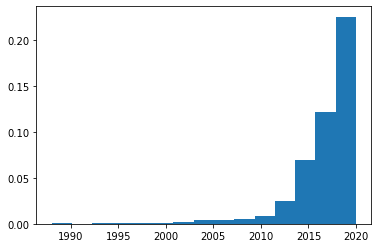

In [40]:
import matplotlib.pyplot as plt
plt.hist(perth_house_df["YEAR_SOLD"], density= True, bins= 15)

In [41]:
perth_house_df = perth_house_df.loc[perth_house_df["YEAR_SOLD"] >= 2013, :]
perth_house_df = perth_house_df.dropna()
perth_house_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,South Lake,565000,4,2,600,160,18300,1800,9,2018,0.828339,15.0
1,Wandi,365000,3,2,351,139,26900,4900,2,2019,5.524324,6.0
2,Camillo,287000,3,1,719,86,22600,1900,6,2015,1.649178,36.0
3,Bellevue,255000,2,1,651,59,17900,3600,7,2018,1.571401,65.0
4,Lockridge,325000,4,1,466,131,11200,2000,11,2016,1.514922,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33648,Aubin Grove,423000,3,2,248,108,24900,5700,5,2016,3.607062,5.0
33649,Middle Swan,467000,4,2,400,132,17100,2500,4,2015,1.116806,1.0
33650,South Fremantle,955000,3,2,200,127,16000,1900,2,2019,1.134956,22.0
33651,South Fremantle,1040000,4,3,292,245,16100,1500,3,2016,1.430350,3.0


In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:

suburb_encoder = OneHotEncoder(sparse = False)
encode_df = pd.DataFrame(suburb_encoder.fit_transform(perth_house_df[["SUBURB"]]))
#Create a Pandas DataFrame of the hot encoded column
encode_df.columns = suburb_encoder.get_feature_names_out()
# #concat with original data
# ML_data = pd.concat([perth_house_df, ohe_df], axis=1).drop(["SUBURB"], axis=1)
encode_df

KeyError: "None of [Index(['SUBURB'], dtype='object')] are in the [columns]"

In [21]:
scaled_data = StandardScaler().fit_transform(perth_house_df)

In [22]:
df_scaled = pd.DataFrame(scaled_data, columns= perth_house_df.columns[:], index= perth_house_df.index)
# df_scaled = df_scaled.dropna()

# Display sample data
df_scaled

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,-0.224697,0.458345,0.293183,-0.091746,-0.309596,-0.103049,-0.588751,0.662105,0.315707,-0.547449,-0.588206
1,-0.786975,-0.895319,0.293183,-0.107244,-0.605815,0.658198,0.153558,-1.402496,0.823501,2.360047,-1.019492
2,-1.006264,-0.895319,-1.416585,-0.084339,-1.353416,0.277575,-0.564805,-0.222724,-1.207677,-0.039231,0.418127
3,-1.096228,-2.248984,-1.416585,-0.088572,-1.734270,-0.138456,-0.157733,0.072219,0.315707,-0.087386,1.807826
4,-0.899431,0.458345,-1.416585,-0.100086,-0.718661,-0.731521,-0.540860,1.251991,-0.699882,-0.122355,-0.444444
...,...,...,...,...,...,...,...,...,...,...,...
33648,-0.623915,-0.895319,0.293183,-0.113655,-1.043091,0.481164,0.345122,-0.517667,-0.699882,1.172983,-1.067413
33649,-0.500213,0.458345,0.293183,-0.104194,-0.704555,-0.209270,-0.421133,-0.812610,-1.207677,-0.368846,-1.259095
33650,0.871745,-0.895319,0.293183,-0.116643,-0.775083,-0.306639,-0.564805,-1.402496,0.823501,-0.357608,-0.252762
33651,1.110713,0.458345,2.002950,-0.110917,0.889387,-0.297787,-0.660587,-1.107553,-0.699882,-0.174717,-1.163254


In [23]:
# Create a list with the number of k-values from 1 to 11
k_Values = list(np.arange(1, 12))
k_Values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:
# function for calculate inertia
def cal_inertia(df, k_list):
    # Create an empty list to store the inertia values
    inertia = []
    # Create a for loop to compute the inertia with each possible value of k
    for i in k_list:
        # Create a KMeans model using the loop counter for the n_clusters
        k_mean = KMeans(n_clusters= i, random_state= 0)
        # Fit the model to the data using `df_market_data_scaled`
        k_mean.fit(df)
        # Append the model.inertia_ to the inertia list
        inertia.append(k_mean.inertia_)
    return inertia

In [25]:
# Create an empty list to store the inertia values
inertia = cal_inertia(df_scaled, k_Values) # calculate inertia

print(inertia)


[310739.0000000002, 265332.26134620514, 235870.46873945685, 210632.99322664074, 192991.02486487944, 181419.51121673733, 171669.51186802483, 162766.60402283884, 155804.60523165972, 150141.54788990886, 144601.71508651075]


In [26]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_Values, "inertia": inertia})
elbow_df.head()

,k,inertia
0,1,310739.000000
1,2,265332.261346
2,3,235870.468739
3,4,210632.993227
4,5,192991.024865


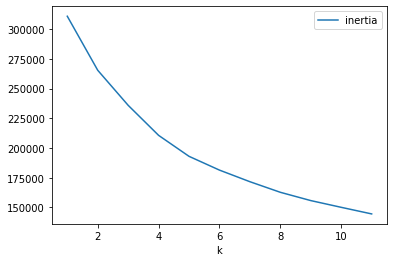

In [27]:
# Plot a line chart with all the inertia values computed with 
# elbow_df.plot.line(x= "k", y= "inertia")
elbow_df.plot(x= "k", y= "inertia")



In [28]:
def clustering(num_cluster, df):
    # Initialise the K-Means model using the best value for k
    model = KMeans(n_clusters= num_cluster, random_state= 0) 
    # Fit the K-Means model using the original data
    model.fit(df)
    # Predict the clusters to group the cryptocurrencies using the original data
    predictions = model.predict(df)
    
    return predictions

In [29]:
predictions = clustering(4, df_scaled) # getting clustering results
# Print the resulting array of cluster values.
print(predictions)

[3 3 2 ... 3 0 2]


In [30]:
# Create a copy of the DataFrame
house_cluster_df = perth_house_df.copy()
house_cluster_df.head()

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,565000,4,2,600,160,18300,1800,9,2018,0.828339,15.0
1,365000,3,2,351,139,26900,4900,2,2019,5.524324,6.0
2,287000,3,1,719,86,22600,1900,6,2015,1.649178,36.0
3,255000,2,1,651,59,17900,3600,7,2018,1.571401,65.0
4,325000,4,1,466,131,11200,2000,11,2016,1.514922,18.0


In [66]:
# Add a new column to the DataFrame with the predicted clusters
house_cluster_df["predicted clusters"] = predictions
house_cluster_df["suburb"] = perth_house_df["SUBURB"]
house_cluster_df["school_rank"] = perth_house_df["NEAREST_SCH_RANK"]

# Display sample data
house_cluster_df

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE,predicted clusters,suburb,school_rank
0,565000,4,2,600,160,18300,1800,9,2018,0.828339,15.0,3,South Lake,NaN
1,365000,3,2,351,139,26900,4900,2,2019,5.524324,6.0,3,Wandi,129.0
2,287000,3,1,719,86,22600,1900,6,2015,1.649178,36.0,2,Camillo,113.0
3,255000,2,1,651,59,17900,3600,7,2018,1.571401,65.0,2,Bellevue,NaN
4,325000,4,1,466,131,11200,2000,11,2016,1.514922,18.0,2,Lockridge,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,423000,3,2,248,108,24900,5700,5,2016,3.607062,5.0,3,Aubin Grove,129.0
33649,467000,4,2,400,132,17100,2500,4,2015,1.116806,1.0,3,Middle Swan,53.0
33650,955000,3,2,200,127,16000,1900,2,2019,1.134956,22.0,3,South Fremantle,128.0
33651,1040000,4,3,292,245,16100,1500,3,2016,1.430350,3.0,0,South Fremantle,49.0


In [69]:
grp = house_cluster_df.groupby("predicted clusters").median()
grp

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE,school_rank
predicted clusters,,,,,,,,,,,,
0,1185000.0,4.0,2.0,728.0,266.0,10200.0,2600.0,7.0,2017.0,1.245996,23.0,34.0
1,570000.0,4.0,2.0,2058.0,195.0,34700.0,15300.0,7.0,2016.0,4.324948,19.0,98.0
2,443000.0,3.0,1.0,700.0,116.0,13200.0,2400.0,7.0,2017.0,1.147210,43.0,65.0
3,515000.0,4.0,2.0,594.0,179.0,19800.0,3300.0,7.0,2018.0,1.315421,15.5,80.0


In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
hvplot.scatter()

In [49]:
house_cluster_df.hvplot.scatter(x= "BUILDING_AGE", y= "PRICE", by= "predicted clusters", size= 1, hover_cols = "suburb")
# plt.scatter(house_cluster_df["LAND_AREA"], house_cluster_df["PRICE"], color= house_cluster_df["predicted clusters"])

:NdOverlay   [predicted clusters]
   :Scatter   [BUILDING_AGE]   (PRICE,suburb)

In [ ]:
encoded_fig = plt.figure()
ax = Axes3D(encoded_fig)
p = ax.scatter(encoded_items[:,0], encoded_items[:,1], encoded_items[:,2], c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)
plt.show()

In [ ]:
pca = PCA(n_components= 5)

In [ ]:
house_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= perth_house_df.index)
house_pca_df.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= perth_house_df.index)
house_pca_df.head()

In [ ]:
kValues = list(np.arange(1, 12))
kValues

In [ ]:
inertia_pca = cal_inertia(house_pca_df, k_Values) # calculate inertia for pca data
print(inertia_pca)

In [ ]:
elbow_pca_df = pd.DataFrame({"k": kValues, "inertia": inertia_pca})
elbow_pca_df.head()

In [ ]:
PCA_elbow = elbow_pca_df.hvplot(x= "k", y= "inertia")
PCA_elbow


In [ ]:
predictions_PCA  = clustering(4, house_pca_df) 
print(predictions_PCA)

In [ ]:
# Create a copy of the DataFrame with the PCA data
house_pca_cluster_df = house_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
house_pca_cluster_df["predicted clusters"] = predictions_PCA

# Display sample data
house_pca_cluster_df.head()

In [ ]:
house_pca_cluster_df.hvplot.scatter(x= "PC1", y= "PC2", 
                                 by= "predicted clusters", size = 1
                                 )